In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch import nn

1000

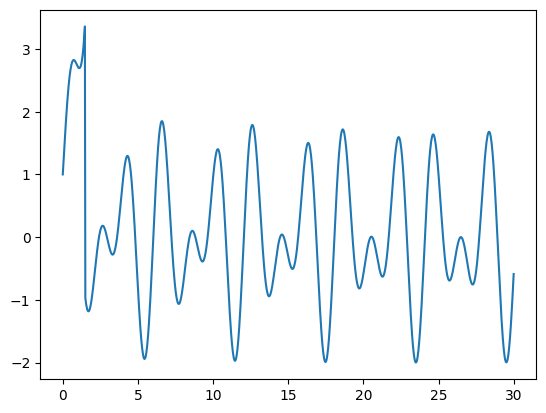

In [3]:
x = np.linspace(0, 30, 1000)
x_1 = x[: len(x) // 20]
x_2 = x[len(x) // 20 :]
y_1 = np.sin(np.pi * x_1) + np.exp(x_1)
y_2 = np.sin(x_2 * 33 * torch.pi / 50) + np.sin(np.pi * x_2)
# y = np.sin(x * 33 * torch.pi / 50) + np.sin(np.pi * x)
y = np.append(y_1, y_2)
plt.plot(x, y)
data = pd.DataFrame(np.array([x, y]).T, columns=["x", "y"])
len(x)

In [4]:
import Network, DataloaderIt, Engine

In [25]:
dataloader = DataloaderIt.DataLoaderIt(data)
train_data, val_data, test_data = dataloader.fit(0.8, 0.1, 0.1)

batch_size set to 800


  0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 1 | train: Loss 1.327014 Accuracy -0.0218 | validation: Loss 10.938520 Accuracy -8.5844
Epoch 2 | train: Loss 10.355666 Accuracy -6.9738 | validation: Loss 235.759003 Accuracy -205.5744
Epoch 3 | train: Loss 241.700211 Accuracy -185.1070 | validation: Loss 12.754309 Accuracy -10.1755
Epoch 4 | train: Loss 14.695631 Accuracy -10.3155 | validation: Loss 2.231153 Accuracy -0.9550
Epoch 5 | train: Loss 3.007552 Accuracy -1.3158 | validation: Loss 3.794698 Accuracy -2.3250
Epoch 6 | train: Loss 3.814477 Accuracy -1.9371 | validation: Loss 3.164451 Accuracy -1.7727
Epoch 7 | train: Loss 2.947314 Accuracy -1.2694 | validation: Loss 2.153324 Accuracy -0.8868
Epoch 8 | train: Loss 2.337775 Accuracy -0.8001 | validation: Loss 2.940460 Accuracy -1.5765
Epoch 9 | train: Loss 2.496515 Accuracy -0.9223 | validation: Loss 1.680409 Accuracy -0.4724
Epoch 10 | train: Loss 1.997252 Accuracy -0.5379 | validation: Loss 1.425783 Accuracy -0.2493
Epoch 11 | train: Loss 1.471956 Accuracy -0.1334 | vali

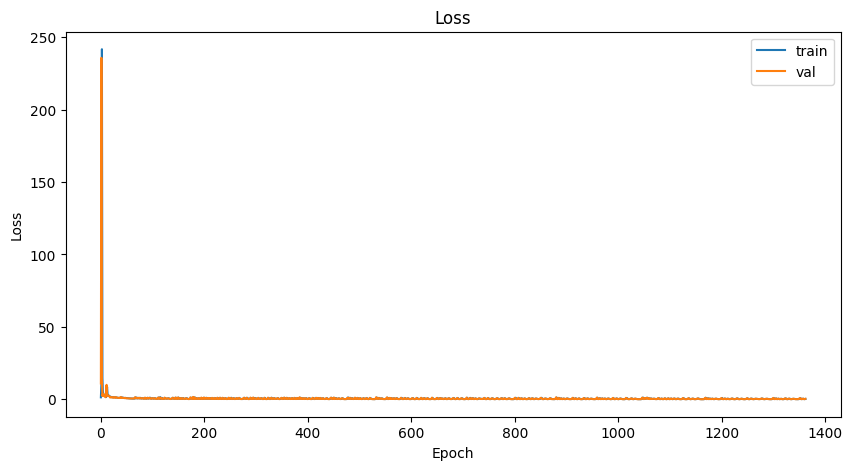

In [60]:
input_size = 1
hidden_size = 128
output_size = 1
lr = 0.06
# epochs = 250
epochs = 2000
torch.manual_seed(42)
model = Network.MLP_02(input_size, hidden_size, output_size)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

engine = Engine.Machine_Engine(model, train_data, val_data, test_data)
engine.fit_to_train(loss_fn=loss_fn,
                    optimizer=optimizer,
                    epochs_num=epochs,
                    early_stop_patience=200)
engine.plot_loss(save=False)

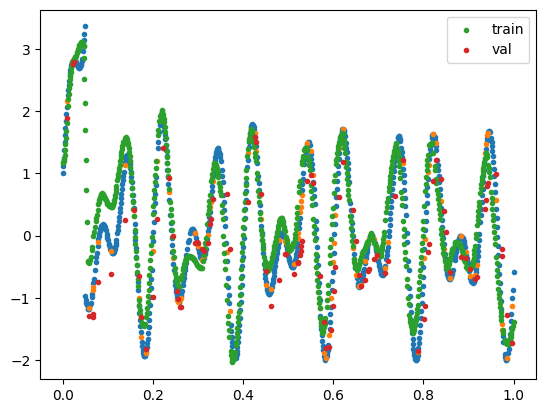

In [61]:
y1 = [item for sublist in engine.train_true_predict_list["predict"][-1] for item in sublist]
y2 = [item for sublist in engine.val_true_predict_list["predict"][-1] for item in sublist]

r1 = [item for sublist in engine.train_true_predict_list["true"][-1] for item in sublist]
r2 = [item for sublist in engine.val_true_predict_list["true"][-1] for item in sublist]

x1 = [item for sublist in engine.train_true_predict_list["input"][-1] for item in sublist]
x2 = [item for sublist in engine.val_true_predict_list["input"][-1] for item in sublist]
# print(len(y1), len(x1))
# print(len(y2), len(x2))

# print(len(y1[0]))
# print(len(x1[0]))

plt.scatter(x1, r1, marker=".")
plt.scatter(x2, r2, marker=".")
plt.scatter(x1, y1, marker=".", label="train")
plt.scatter(x2, y2, marker=".", label="val")
plt.legend()

In [45]:
loss, acc, _ =engine.test(loss_fn)
loss, acc

[!!!IMPORTANT NOTE!!!]
The test_function provided here is intended solely for the final model analysis and reporting purposes.
Please refrain from using it as a general-purpose function in your own projects. Always refer to
the appropriate train and validation data for developing and fine-tuning your own models.


(0.13989028334617615, 0.88274996727705)